In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:

data = pd.read_csv('merged_data.csv')
print(data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [29]:

print(data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'Cluster'],
      dtype='object')


In [30]:

data.columns = data.columns.str.strip()


In [32]:

features = data[['Price_x', 'Quantity', 'TotalValue']]  


In [33]:

data.columns = data.columns.str.strip()
print(data.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'Cluster'],
      dtype='object')


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


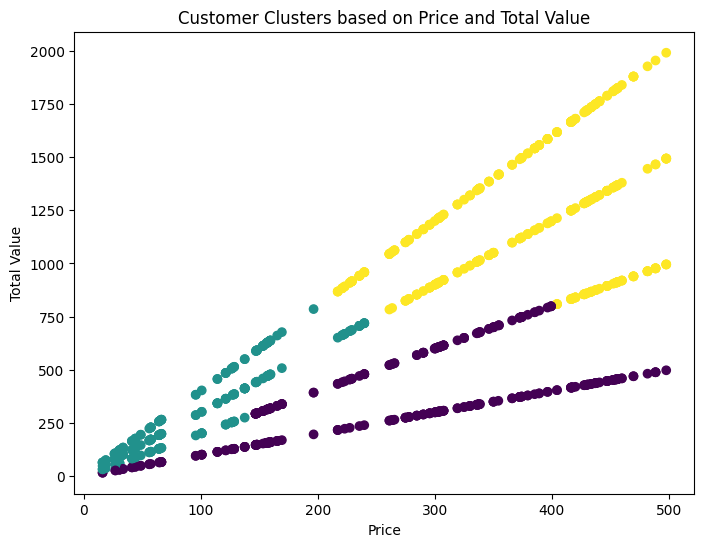

In [34]:

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(normalized_features)
plt.figure(figsize=(8, 6))
plt.scatter(data['Price_x'], data['TotalValue'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Clusters based on Price and Total Value')
plt.xlabel('Price')
plt.ylabel('Total Value')
plt.show()


In [25]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

db_index = davies_bouldin_score(normalized_features, data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

sil_score = silhouette_score(normalized_features, data['Cluster'])
print(f'Silhouette Score: {sil_score}')


Davies-Bouldin Index: 0.8497454238459565
Silhouette Score: 0.42254019994857767


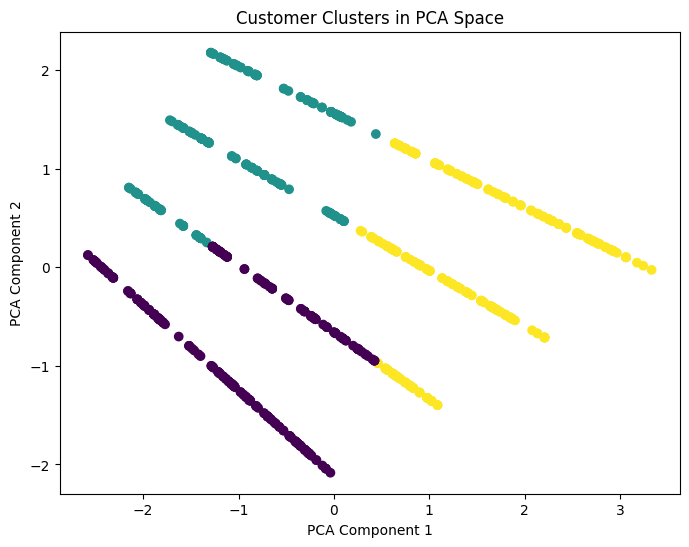

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Clusters in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [27]:

data.to_csv('clustered_data.csv', index=False)


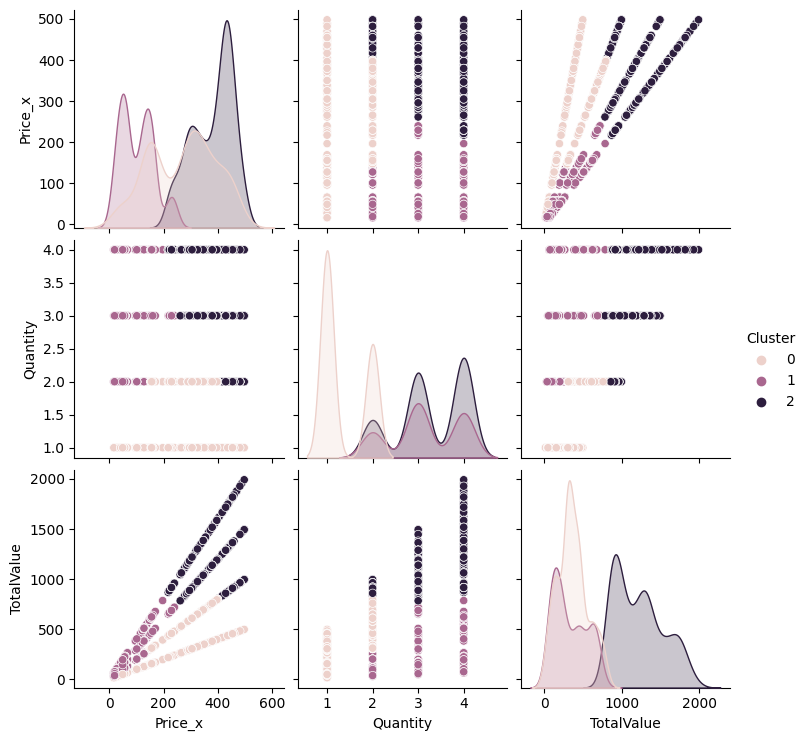

In [35]:
import seaborn as sns
sns.pairplot(data, hue='Cluster', vars=['Price_x', 'Quantity', 'TotalValue'])
plt.show()


In [36]:

data[['CustomerID', 'Cluster']].to_csv('Shaik_Mohammed_Shakeel_Clustering.csv', index=False)
